
# **Photovoltaic Performance Monitoring**

2022 Hugo Bertini


## Here is what this is expected to look like:
1. **Get paid consumption historical data from e-redes**
    - monthly basis
    - 15 minute interval average

1. **Get photovoltaic production data from Shelly**
     - whenever possible
     - use REST client on nodemcu board with micro SD, combined the same client on laptop 

1. **Get Sun exposure data from VisualCrossing**
    - hourly detail - get on daily basis
    - daily detail - get on monthly or weekly basis
    - daily limited 1000 weather records

1. **Get power consumption rates from commercial entity**
     - care for time of day and day of week
     - update rates and ranges monthly

1. **Calculate correlation between paid consumption and production**
     - should be negative most of day time

1. **Calculate correlation between sun exposure and production**
    - should be positive

1. **Calculate Economical Saving**
    - depends on usage and solar exposition
    - assumes the produced electricity would be charged according to the same rate table

1. **Calculate correlation between time of year and Economical Saving**
    - expected trend to favour spring and summer
    
1. **Calculate correlation between usage habits and peak production times**
    - analyse per month of the year

1. **Forecast best moments for flexible usages**
    - for example, answer questions like "on the next few days, when will be the most economical and environment efficient moments for laundry washing?"




# 1. Get paid consumption historical data from e-redes

**what**

- collected on a monthly basis
- data: 15 minute interval average
- data: daily readings

**how and where**

- the data will be acquired manually from the e-redes account, into xlsx files;
- the files are expected to be located under the ./data/ folder;
- consumption file naming conventions:
   - daily readings: `Leituras_yyyymmdd_deyyyymmdd_ayyyymmdd.xlsx`  # the first date is that of file generation; `deyyyymmdd` is the 'from' date; `ayyyymmdd` is the 'to' date
   - 15-minute readings: `Consumos_yyyymmdd_yyyy-mm.xlsx`   # the first date is that of file generation; the second date is the month the data refers to
- sample of 15-minute data:

> <pre>Dados Globais
> 
> CPE        
> Funções    Consumo registado kW
>            Produção registada kW
> Mês/Ano    setembro 2022
> Intervalo: 15 min
> 
> Data          Hora     Consumo registado kW
> 2022/09/01    00:15    0,204
> 2022/09/01    00:30    0,204
> . . .</pre>

- sample of daily data:

> <pre>Morada						
> CPE						
> Número do contador						
>  						
>  						
>  						
> Tabela de Leituras                                                                   Energia Ativa (kWh)
> Data da Leitura   Origem                              Estado                         Vazio   Ponta   Cheias
> 03/10/2022        Operador de Rede de Distribuição    Válida    Energia consumida    9782    3718    10423
> 02/10/2022        Operador de Rede de Distribuição    Válida    Energia consumida    9776    3718    10423
> . . .</pre>





# 2. Get photovoltaic production data from Shelly

**what and when**

- collected whenever possible
- use REST client on nodemcu board with micro SD, combined the same client on laptop
- data: 15 minute interval average

**how and where**

- the data will be acquired automatically from the Shelly Plug-s (attached to the Photovoltaic input), into csv files;
- the data collector will run transparently from one or more devices simultaneously: a NodeMCU board (with micropython), a laptop, and an android device;
- the data files will be brought to this tool manually or otherwise;
- the files are expected to be located under the ./data/ folder;
- production file naming conventions:
   - production readings: `Photovoltaic_Production_yyyymmdd.xlsx`   # the date is that of file generation and of the data
- api specifications: https://shelly-api-docs.shelly.cloud/gen1/#shelly-plug-plugs
- sample of production data:
> <pre>
> NOT AVAILABLE YET. DATA WILL INCLUDE RELEVANT DETAILS MADE AVAILABLE BY THE SHELLY INTERFACE
> . . .</pre>

- handle duplicates, due to the possibility of the same data comming from multiple sources


# 3. Get Sun exposure data from [VisualCrossing](https://www.visualcrossing.com)

**what and when**

- hourly detail - get on daily basis
- daily detail - get on monthly or weekly basis
- daily limited 1000 weather records

**how and where**

- the data will be acquired 
    - automatically from VisualCrossing's API:
        - https://www.visualcrossing.com/weather-api 
        - https://www.visualcrossing.com/weather/weather-data-services/algueir%C3%A3o?v=api
    - manually from VisualCrossing's web site:
        - from https://www.visualcrossing.com/weather-history/algueir%C3%A3o;
- the automated data collector will run transparently from one or more devices simultaneously: a NodeMCU board (with micropython), a laptop, and an android device;
- the data files will be brought to this tool manually or otherwise;
- the files are expected to be located under the ./data/ folder;
- file naming conventions:
   - hourly data: `WeatherHistory_hourly_yyyymmdd_from-yyyymmdd_to-yyyymmdd.csv`   # the first date is that of file generation; the next two dates are the 'from' and 'to' dates of the data
   - daily  data: `WeatherHistory_dayly_yyyymmdd_from-yyyymmdd_to-yyyymmdd.csv`    # the first date is that of file generation; the next two dates are the 'from' and 'to' dates of the data
- sample of hourly data:

> <pre>name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
> "Algueirão, Sintra, Portugal",2022-10-05T00:00:00,20.6,20.6,5.7,37.82,0,0,,0,0,26.6,11.2,320,1020.7,0,10,0,,0,10,Clear,clear-night,"LPMT,LPPT"
> "Algueirão, Sintra, Portugal",2022-10-05T01:00:00,20.6,20.6,4.7,35.28,0,0,,0,0,25.9,6.8,357.4,1020,0,10,0,,0,10,Clear,clear-night,"LPMT,LPPT"
> . . .
> </pre>


- sample of daily data:

> <pre>name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
> "Algueirão, Sintra, Portugal",2022-10-05,26.2,16.7,20.6,26.2,16.7,20.6,9.3,50,0,0,0,,0,0,50.4,20.9,285.6,1021,0.8,15.9,201.8,17.4,7,10,2022-10-05T07:36:50,2022-10-05T19:14:12,0.39,Clear,Clear conditions throughout the day.,clear-day,"D7126,LPMT,LPPT"
> "Algueirão, Sintra, Portugal",2022-10-06,26.2,15.3,20,26.2,15.3,20,13.7,68.4,0,0,0,,0,0,50.8,15.8,290.4,1020.8,52.1,24.1,166.1,14.1,6,10,2022-10-06T07:37:47,2022-10-06T19:12:40,0.43,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,
> . . .
> </pre>

- handle duplicates, due to the possibility of the same data comming from multiple sources


# 4. Get power consumption rates from commercial entity

**what and when**

- care for time of day and day of week
- update rates and ranges monthly

**how and where**

- the data will be filled-in manually into a csv
- the data will associate contractual date ranges to rates 
- the data will specify rates applicable according to week day and time
- sample of consumption rates data:
> <pre>
> NOT AVAILABLE YET.
> . . .</pre>
- current contractual conditions:
    - duration: 12 months (renewed automatically)
    - tariff: binary time periods (economic & normal), weekly consumption plan schedule
    - available power: 5,75 kVA
    - daily rate of available power: 0,2661 €
    - economic rate period (€/kWh): 0,1073 €
    - normal rate period (€/kWh): 0,1073 €
- daily schedule of economic and non-economic rates:
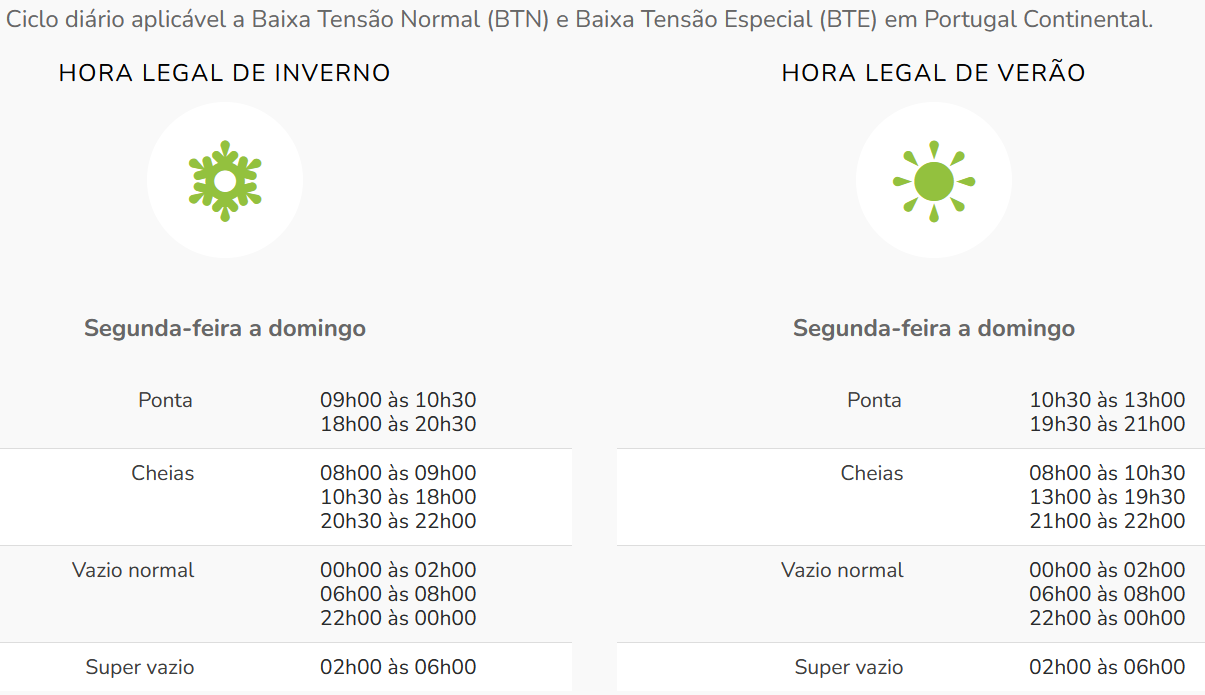
> **Ciclo diário aplicável a Baixa Tensão Normal (BTN) e Baixa Tensão Especial (BTE) em Portugal Continental.**
> **Winter**
> 
> Segunda-feira a domingo
> 
> Ponta         09h00 às 10h30; 18h00 às 20h30
> Cheias        08h00 às 09h00; 10h30 às 18h00; 20h30 às 22h00
> Vazio normal  00h00 às 02h00; 06h00 às 08h00; 22h00 às 00h00
> Super vazio   02h00 às 06h00
> 
> **Summer**
> 
> Segunda-feira a domingo
> 
> Ponta	10h30 às 13h00
> 19h30 às 21h00
> Cheias	08h00 às 10h30
> 13h00 às 19h30
> 21h00 às 22h00
> Vazio normal	00h00 às 02h00
> 06h00 às 08h00
> 22h00 às 00h00
> Super vazio	02h00 às 06h00

- weekly schedule of economic and non-economic rates:
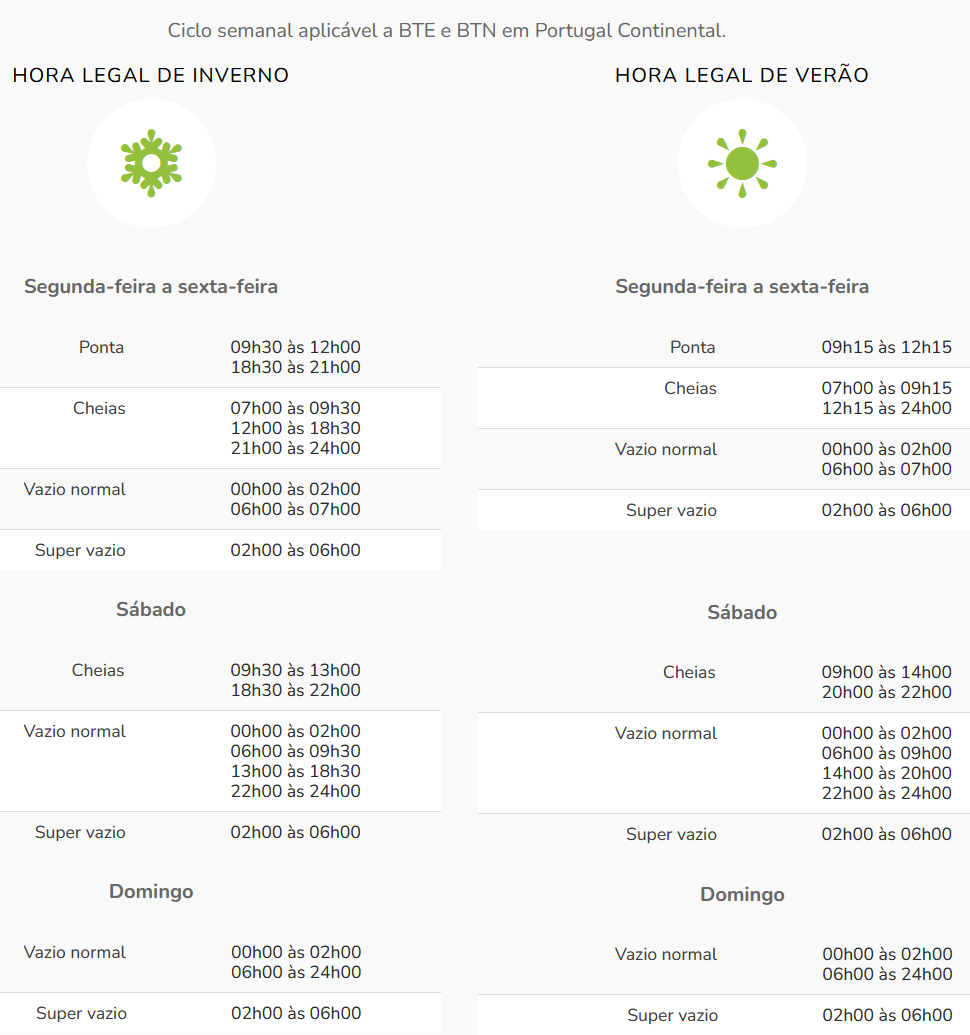
> **Ciclo semanal aplicável a BTE e BTN em Portugal Continental.**
> **Hora legal de Inverno**
> 
> Segunda-feira a sexta-feira
> 
> Ponta	09h30 às 12h00
> 18h30 às 21h00
> Cheias	07h00 às 09h30
> 12h00 às 18h30
> 21h00 às 24h00
> Vazio normal	00h00 às 02h00
> 06h00 às 07h00
> Super vazio	02h00 às 06h00
> 
> Sábado
> 
> Cheias	09h30 às 13h00
> 18h30 às 22h00
> Vazio normal	00h00 às 02h00
> 06h00 às 09h30
> 13h00 às 18h30
> 22h00 às 24h00
> Super vazio	02h00 às 06h00
> 
> Domingo
> 
> Vazio normal	00h00 às 02h00
> 06h00 às 24h00
> Super vazio	02h00 às 06h00
> 
> **Hora legal de Verão**
> 
> Segunda-feira a sexta-feira
> 
> Ponta	09h15 às 12h15
> Cheias	07h00 às 09h15
> 12h15 às 24h00
> Vazio normal	00h00 às 02h00
> 06h00 às 07h00
> Super vazio	02h00 às 06h00
> 
>  
> 
> Sábado
> 
> Cheias	09h00 às 14h00
> 20h00 às 22h00
> Vazio normal	00h00 às 02h00
> 06h00 às 09h00
> 14h00 às 20h00
> 22h00 às 24h00
> Super vazio	02h00 às 06h00
> 
> Domingo
> 
> Vazio normal	00h00 às 02h00
> 06h00 às 24h00
> Super vazio	02h00 às 06h00